# Cancer Research Data Analysis

Welcome to the second healthcare data analysis project of the cancer research dataset. The dataset contains cancer statistics across various counties, such as death rates, and trends.

### Objectives
1. Data filtering with SQL
    - Select counties with an age-adjusted death rate greater than 50 
    - Filter for a recent trend that is either 'stable', 'rising' or 'falling'.

2. Exploratory data analysis

#### 1. Data filtering with SQL

In [ ]:
WITH cancer_cte AS (
    SELECT 
        county,
        fips,
        met_objective,
        age_adjusted_death_rate,
        lower_confidence_interval_death_rate,
        upper_confidence_interval_death_rate,
        average_deaths_per_year,
        recent_trend,
        recent_5year_trend_death_rates,
        lower_confidence_interval_trend,
        upper_confidence_interval_trend
    FROM cancer_data
    WHERE age_adjusted_death_rate > 50
		AND recent_trend IN ('stable', 'rising', 'falling')
)
SELECT *
FROM cancer_cte;

#### 2. Exploratory data analysis

Import the required packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import the dataset from the csv file

In [2]:
df = pd.read_csv('D:/Programming/pydir/Apps/tutorial/cancer_research/cancer_filtered.csv', delimiter = ',')

In [3]:
df.head()

,county,fips,met_objective,age_adjusted_death_rate,lower_confidence_interval_death_rate,upper_confidence_interval_death_rate,average_deaths_per_year,recent_trend,recent_5year_trend_death_rates,lower_confidence_interval_trend,upper_confidence_interval_trend
0,"Autauga County, Alabama",1001,No,59.3,50.6,69.2,34,falling,-1.5,-2.6,-0.3
1,"Barbour County, Alabama",1005,No,61.3,49.6,75.0,20,stable,0.5,-1.2,2.2
2,"Bibb County, Alabama",1007,No,67.8,54.0,84.1,17,stable,0.3,-1.4,2.1
3,"Blount County, Alabama",1009,No,59.9,52.0,68.6,43,falling,-1.6,-2.5,-0.6
4,"Butler County, Alabama",1013,No,52.6,41.5,66.2,15,stable,0.1,-1.6,1.7


Data processing and cleaning

In [4]:
# Convert the age_adjusted_death_rate, recent_5year_trend_death_rates, and average_deaths_per_year columns to numeric type
df['age_adjusted_death_rate'] = pd.to_numeric(df['age_adjusted_death_rate'], errors='coerce')
df['recent_5year_trend_death_rates'] = pd.to_numeric(df['recent_5year_trend_death_rates'], errors='coerce')
df['average_deaths_per_year'] = pd.to_numeric(df['average_deaths_per_year'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['age_adjusted_death_rate', 'recent_5year_trend_death_rates', 'average_deaths_per_year'], inplace=True)

# Display the number of missing values for each column
print(df.isnull().sum())

county                                  0
fips                                    0
met_objective                           0
age_adjusted_death_rate                 0
lower_confidence_interval_death_rate    0
upper_confidence_interval_death_rate    0
average_deaths_per_year                 0
recent_trend                            0
recent_5year_trend_death_rates          0
lower_confidence_interval_trend         0
upper_confidence_interval_trend         0
dtype: int64
county                                  0
fips                                    0
met_objective                           0
age_adjusted_death_rate                 0
lower_confidence_interval_death_rate    0
upper_confidence_interval_death_rate    0
average_deaths_per_year                 0
recent_trend                            0
recent_5year_trend_death_rates          0
lower_confidence_interval_trend         0
upper_confidence_interval_trend         0
dtype: int64


Calculate summary statistics for the age_adjusted_death_rate column

In [5]:
# Calculate the mean, median, standard deviation, maximum, minimum, and range of the age_adjusted_death_rate
mean_age_adjusted_rate = df['age_adjusted_death_rate'].mean()
median_age_adjusted_rate = df['age_adjusted_death_rate'].median()
std_age_adjusted_rate = df['age_adjusted_death_rate'].std()
max_age_adjusted_rate = df['age_adjusted_death_rate'].max()
min_age_adjusted_rate = df['age_adjusted_death_rate'].min()
age_adjusted_rate_range = max_age_adjusted_rate - min_age_adjusted_rate

Print the calculated summary statistics

In [6]:
print("Age adjusted death rate summary:")
print(f"Mean: {mean_age_adjusted_rate:.2f}")
print(f"Median: {median_age_adjusted_rate:.2f}")
print(f"Standard deviation: {std_age_adjusted_rate:.2f}")
print(f"Max: {max_age_adjusted_rate:.2f}")
print(f"Min: {min_age_adjusted_rate:.2f}")
print(f"Range: {age_adjusted_rate_range:.2f}")

Age adjusted death rate summary:
Mean: 60.81
Median: 57.60
Standard deviation: 10.21
Max: 125.60
Min: 50.10
Range: 75.50


Create a scatter plot with linear regression

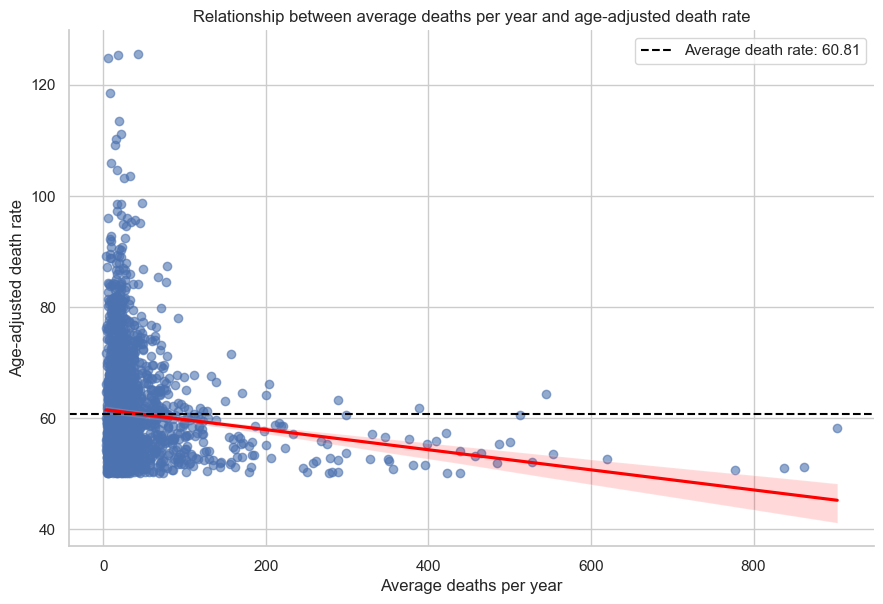

Slope: -0.018
Intercept: 61.541
R-squared: 0.016


In [28]:
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression model fit
sns.lmplot(
    x='average_deaths_per_year', 
    y='age_adjusted_death_rate', 
    data=df, 
    height=6, 
    aspect=1.5, 
    line_kws={"color": "red"},  # Customize regression line color
    scatter_kws={"alpha": 0.6}  # Customize scatter points
)

# Add title and axis labels
plt.title("Relationship between average deaths per year and age-adjusted death rate")
plt.xlabel("Average deaths per year")
plt.ylabel("Age-adjusted death rate")

# Add calculation results to the plot
plt.axhline(y=mean_age_adjusted_rate, color='black', linestyle='--', label=f'Average death rate: {mean_age_adjusted_rate:.2f}')
plt.legend()

# Display the plot
plt.show()

# Additional Analysis: Linear Regression Calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(df['average_deaths_per_year'], df['age_adjusted_death_rate'])
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")

Generate a combined histogram and KDE plot to visualize the distribution of age_adjusted_death_rate and recent_5year_trend_death_rates

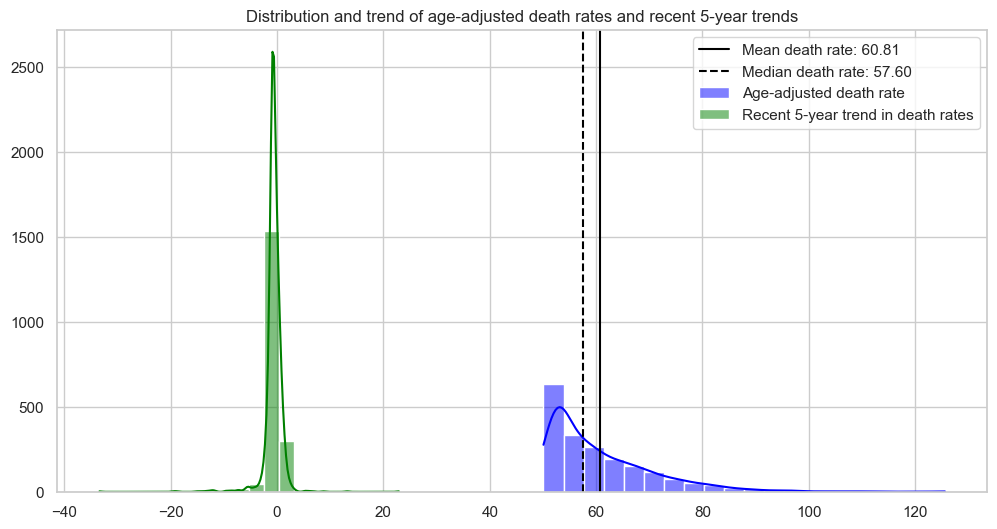

In [27]:
# Combined Histogram and KDE Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['age_adjusted_death_rate'], kde=True, color='blue', bins=20, label='Age-adjusted death rate')
sns.histplot(df['recent_5year_trend_death_rates'], kde=True, color='green', bins=20, label='Recent 5-year trend in death rates')
plt.axvline(x=mean_age_adjusted_rate, color='black', linestyle='-', label=f'Mean death rate: {mean_age_adjusted_rate:.2f}')
plt.axvline(x=median_age_adjusted_rate, color='black', linestyle='--', label=f'Median death rate: {median_age_adjusted_rate:.2f}')

# Customizing the Plot
plt.title('Distribution and trend of age-adjusted death rates and recent 5-year trends')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Show the plot
plt.show()